In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("Position_Salaries.csv")

In [3]:
pd.DataFrame(dataset)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
X = dataset.iloc[:,1:2].values

In [5]:
Y = dataset.iloc[:,2:3].values

<h4>Note:- keep Y as  vector and not an array as the SVR regressor takes inputs for the dependent variable as a vector and not an array</h4>
<br> <i> will get a type warning</i>

In [6]:
pd.DataFrame(np.concatenate((X,Y.reshape((Y.size,1))),axis=1))

,0,1
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000
5,6,150000
6,7,200000
7,8,300000
8,9,500000
9,10,1000000


Scaling both the vectors using the standardscalar module

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc_x = StandardScaler()
sc_y = StandardScaler()
X = sc_x.fit_transform(X)
Y = sc_y.fit_transform(Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


acceptable warning cause data is being converted to float from int due to feature scaling

### Importing the regressor from the SVM library

In [10]:
from sklearn.svm import SVR

In [11]:
regressor = SVR(kernel = "rbf",gamma = "auto")


### Kernel function used:-
RBF:- Radial Basis function
<br><br>
$$K(x_1,x_2) = e^{-{\frac{(x_1-x_2)^2}{2\sigma^2}}}$$
<br><br>
$\sigma$ is a free pameter and is what will control the extent of fit of the decision boundary
<br> a large $\sigma$ results in an overfitted model

In [16]:
regressor.fit(X,Y.reshape((Y.size,)))

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### Plotting the results

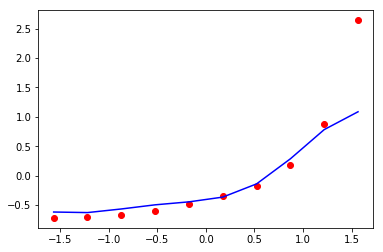

In [42]:
plt.plot(X,Y,"ro")
plt.plot(X,regressor.predict(X),color = 'blue')

### Important note



This is the properly scaled SVR model<br>
otherwise, if we did not scale the dependent and independent variable vectors (the model uses euclidean distance) the model would heavily depend on Y component of the support vector because they are significantly larger numerically hence scaling eliminates this problem

### Prediction step

In [51]:
Y_pred = sc_y.inverse_transform(regressor.predict(sc_x.transform(np.array([[6.5]]))))

note:- [[6.5]] creates an array of 2 dimensions

In [52]:
Y_pred

array([170370.0204065])

### higher resolution plot

In [60]:
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape((X_grid.size,1))

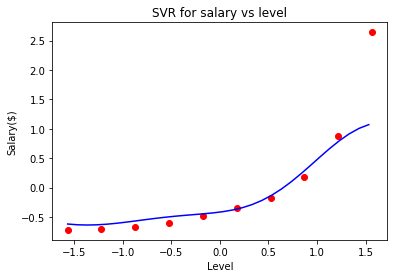

In [62]:
plt.plot(X,Y,'ro')
plt.plot(X_grid,regressor.predict(X_grid),color = 'blue')
plt.title('SVR for salary vs level')
plt.xlabel('Level')
plt.ylabel('Salary($)')
plt.show()